## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import pickle


### Api Key

In [2]:
client_id = "oXRz7HWebFp6YdQ0YT3PMQ"
api_key = "Mm2MVQluEx7HWKjAMxJQT_KOSB_nKvEeQmjn19VS9PnsOBDoqtegFU1RoBXG0Lum415Eus2bKYuo-eb6mgMm1xV5nhwh3H5uhg-HJN39VFSMjIkwyRCbpLVv7ws7XXYx"

## Helper Functions

In [3]:
#api calls
def yelp_call(url_params, api_key):

    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()['businesses']
    return data

In [4]:
#API call for 1000 restaurants
def all_results(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    results = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        results.append(yelp_call(url_params, api_key))
#         time.sleep(1) #Wait a second
        cur += 50
    return results

In [12]:
#Params
term = 'Restaurants'
location = '10314'
radius = 35000
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50,
                'radius': radius
             }

In [13]:
## API Call for 1000 Restaurants

In [14]:
#Getting info using function created previously
all_restaurants = all_results(url_params, api_key)
print(len(all_restaurants))

1900 total matches found.
20


In [15]:
all_restaurants[0][0]

{'id': 'rcXD-hf7KTsY28ikeVJMuw',
 'alias': 'thali-bar-baar-staten-island',
 'name': 'Thali Bar Baar',
 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/2h_ZN9JfHN3QGe0Lu_bmWw/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/thali-bar-baar-staten-island?adjust_creative=oXRz7HWebFp6YdQ0YT3PMQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oXRz7HWebFp6YdQ0YT3PMQ',
 'review_count': 41,
 'categories': [{'alias': 'indpak', 'title': 'Indian'},
  {'alias': 'himalayan', 'title': 'Himalayan/Nepalese'}],
 'rating': 4.0,
 'coordinates': {'latitude': 40.60054, 'longitude': -74.16262},
 'transactions': ['delivery', 'pickup'],
 'location': {'address1': '1949 Richmond Ave',
  'address2': None,
  'address3': '',
  'city': 'Staten Island',
  'zip_code': '10314',
  'country': 'US',
  'state': 'NY',
  'display_address': ['1949 Richmond Ave', 'Staten Island, NY 10314']},
 'phone': '+19293640144',
 'display_phone': '(929) 364-0144',
 'distance': 428.05593414689736}

## Parse API Data for Relevant Info

In [16]:
#function to parse the data and keep only the parts of each entry that we need
def parse_api(data):
    parsed_data = []
    final_parsed_restaurants = []
    for i in range(len(data)):
        for j in range(50):
            parsed_data.append(data[i][j])
    
    #create a list with SQL tables columnns names
    for parsed_restaurant in parsed_data:
        if 'price' in parsed_restaurant.keys():
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': parsed_restaurant['price'],'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
        else:
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': "",'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
    return final_parsed_restaurants

In [17]:
#call the function and return a list with only the columns names we need
parsed_restaurants_v1 = parse_api(all_restaurants)

In [18]:
len(parsed_restaurants_v1)

1000

In [19]:
parsed_restaurants_v1

[{'restaurant_id': 'rcXD-hf7KTsY28ikeVJMuw',
  'restaurant_name': 'Thali Bar Baar',
  'price': '',
  'rating': 4.0,
  'review_count': 41},
 {'restaurant_id': 'qzxSdHp31nOFvrftOM3p2g',
  'restaurant_name': 'West Shore Inn Steakhouse',
  'price': '$$',
  'rating': 4.0,
  'review_count': 257},
 {'restaurant_id': 'CExfaNN6avB7U_JSRXK0Jw',
  'restaurant_name': "Tommy's Tavern + Tap",
  'price': '$$',
  'rating': 4.0,
  'review_count': 246},
 {'restaurant_id': '1zdtxNVUsjkOI0pzXg0RKw',
  'restaurant_name': 'Lil M Bubble Tea',
  'price': '',
  'rating': 4.0,
  'review_count': 2},
 {'restaurant_id': 'YOOZjCcC4s1MOBtFsaMB8w',
  'restaurant_name': 'The Richmond',
  'price': '',
  'rating': 4.5,
  'review_count': 90},
 {'restaurant_id': 'HK4mjpUdZ6xrw3OrsBV8zA',
  'restaurant_name': 'Barca',
  'price': '$$$',
  'rating': 4.5,
  'review_count': 82},
 {'restaurant_id': 's63N2t9IwXIABlVXR26CWg',
  'restaurant_name': 'Pho Mac Vietnamese Restaurant',
  'price': '$$',
  'rating': 4.0,
  'review_count':

In [20]:
df = pd.DataFrame.from_dict(parsed_restaurants_v1)

In [58]:
df.loc[df['restaurant_id'] == 'HWbZPqMLaUZn6yoRRylO6w']

,price,rating,restaurant_id,restaurant_name,review_count
115,,4.5,HWbZPqMLaUZn6yoRRylO6w,Luk & Bart Homemade Food,8


In [21]:
df.head()

,price,rating,restaurant_id,restaurant_name,review_count
0,,4.0,rcXD-hf7KTsY28ikeVJMuw,Thali Bar Baar,41
1,$$,4.0,qzxSdHp31nOFvrftOM3p2g,West Shore Inn Steakhouse,257
2,$$,4.0,CExfaNN6avB7U_JSRXK0Jw,Tommy's Tavern + Tap,246
3,,4.0,1zdtxNVUsjkOI0pzXg0RKw,Lil M Bubble Tea,2
4,,4.5,YOOZjCcC4s1MOBtFsaMB8w,The Richmond,90


In [22]:
#exporting data to excel for partner to use
df.to_excel("Restaurant_Staten_Island.xlsx")

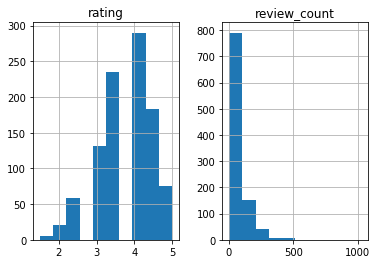

In [23]:
df.hist()
plt.show()

### Prepping for Full Scrape

In [24]:
restaurant_id_list = list(df.restaurant_id)

In [25]:
restaurant_id_list

['rcXD-hf7KTsY28ikeVJMuw',
 'qzxSdHp31nOFvrftOM3p2g',
 'CExfaNN6avB7U_JSRXK0Jw',
 '1zdtxNVUsjkOI0pzXg0RKw',
 'YOOZjCcC4s1MOBtFsaMB8w',
 'HK4mjpUdZ6xrw3OrsBV8zA',
 's63N2t9IwXIABlVXR26CWg',
 'AbkiG5m3JAkaPyapAeuZLw',
 'ShQz0wFmdLkFcqI_sb6oBA',
 'gEmAC20Mifdsa_5IoXsyrA',
 'GvXRLqZKw6vC8zBCDXnyhQ',
 'hSfJ5n_jAduyLV2uxPcEaQ',
 'x_ojll0Ik-UPyXnSkgFBPQ',
 'UuiW2A-O11Q0baqSEUMvZA',
 'd_4dmneuGuJES1ikgQWJHA',
 '3jivt3RU-HlUZfk6I2kaqw',
 'oXkCGBRjP-qERDlEgPlwxQ',
 'Nk2BdPhLB8WriGnFoaNG3Q',
 'F9huT0BCyASm3KwsKBjBNQ',
 'hOuETUkoGbMDyA4w9fmdmg',
 'YqXl2aa7XCaP3VgXkU9x-g',
 'MIHDANEJyqStu3CrbDHQcA',
 'Fyzulvq2QNhoaPnNfGvGGQ',
 'JTdkzPMNPVN4shyW7v768A',
 '4iKGVhy9NxbtNSfXNsT2Vg',
 '9yvIxnZbRcMg-TqskkRTQQ',
 'qn9dgCRGNjHKDGilBamkiw',
 'diOj0F4AZuiqzNTu-z3hOQ',
 '76B7-T4f1EdsQsoI0NM9Wg',
 'GXq2Qsm--A7QQt9rTXldig',
 'Dci3yvrnPZ5kOF5t3xV8gg',
 'KLLRrrPHsA5oQKYwreTI9w',
 '_4ztTCCumLK79ZJkNqL3ZQ',
 'dmCqbWwTFHqri_6fr3KlNw',
 '-BmS1FH3DSK6fSifIt8GgQ',
 '0O0DV4tKQkp2lS2wGcg_7A',
 'WgWRpL8dyTLA1fBaxzvZ6A',
 

## Test Scrape for 1 Restaurant

In [32]:
# creating the link to access the reviews
url_prefix = 'https://www.yelp.com/biz/'
url_suffix = '?rh_type=phrase'
test_id = 'qzxSdHp31nOFvrftOM3p2g'
full_url = url_prefix+test_id+url_suffix

In [33]:
full_url

'https://www.yelp.com/biz/qzxSdHp31nOFvrftOM3p2g?rh_type=phrase'

In [34]:
source = requests.get(full_url).text

In [35]:
source

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="no-js" lang="en"> <!--<![endif]-->\n    <head>\n        <script>\n            (function() {\n                var main = null;\n\n                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(

In [36]:
soup = BeautifulSoup(source,'lxml')

In [37]:
print(soup.prettify())

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script>
   (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){document.body.innerHTML=

In [38]:
reviews_section = soup.find(class_='lemon--span__373c0__3997G',lang='en')


In [39]:
reviews_section

<span class="lemon--span__373c0__3997G" lang="en">Wow this place was straight up out of a movie. Classic steakhouse in Staten Island. I was blown away by the service. The accents were tickling me, I couldn't get enough of it. <br/><br/>The steak I had was one of the best I can remember. The sides were fantastic! I had no idea you could get such good creamed spinach and Steak on Staten Island. I was just passing through, very glad I stopped. <br/><br/>There was plenty of parking, they were so fast with service as it was lunch time. I was so pleasantly surprised at this small steakhouse, I would say the people that live in this small town are very lucky to have it.</span>

In [40]:
reviews_section.text

"Wow this place was straight up out of a movie. Classic steakhouse in Staten Island. I was blown away by the service. The accents were tickling me, I couldn't get enough of it. The steak I had was one of the best I can remember. The sides were fantastic! I had no idea you could get such good creamed spinach and Steak on Staten Island. I was just passing through, very glad I stopped. There was plenty of parking, they were so fast with service as it was lunch time. I was so pleasantly surprised at this small steakhouse, I would say the people that live in this small town are very lucky to have it."

In [41]:
all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
all_reviews_section

[<span class="lemon--span__373c0__3997G" lang="en">Wow this place was straight up out of a movie. Classic steakhouse in Staten Island. I was blown away by the service. The accents were tickling me, I couldn't get enough of it. <br/><br/>The steak I had was one of the best I can remember. The sides were fantastic! I had no idea you could get such good creamed spinach and Steak on Staten Island. I was just passing through, very glad I stopped. <br/><br/>There was plenty of parking, they were so fast with service as it was lunch time. I was so pleasantly surprised at this small steakhouse, I would say the people that live in this small town are very lucky to have it.</span>,
 <span class="lemon--span__373c0__3997G" lang="en">If I could give this place and these fine artists with food more than 5 stars I'd do it.<br/>I've now eaten here 3 times. The quality of the meat is exceptional, tender and properly cooked. The salads are fresh with a really smooth home recipe horseradish dressing - a

## Scrape for All 1000 Restaurants

In [42]:
reviews=[]
for i in range(len(all_reviews_section)):
    reviews.append({i:all_reviews_section[i].text})

In [43]:
reviews

[{0: "Wow this place was straight up out of a movie. Classic steakhouse in Staten Island. I was blown away by the service. The accents were tickling me, I couldn't get enough of it. The steak I had was one of the best I can remember. The sides were fantastic! I had no idea you could get such good creamed spinach and Steak on Staten Island. I was just passing through, very glad I stopped. There was plenty of parking, they were so fast with service as it was lunch time. I was so pleasantly surprised at this small steakhouse, I would say the people that live in this small town are very lucky to have it."},
 {1: 'If I could give this place and these fine artists with food more than 5 stars I\'d do it.I\'ve now eaten here 3 times. The quality of the meat is exceptional, tender and properly cooked. The salads are fresh with a really smooth home recipe horseradish dressing - all optional - of course. They listened to me say that I didn\'t like girly sweet drinks and suggested the smoky old fa

In [54]:
def scrape_list(list_id):
    reviews=[]
    for resto_id in tqdm(list_id):
        url_prefix = 'https://www.yelp.com/biz/'
        url_suffix = ['?rh_type=phrase','?start=20', '?start=40', '?start=60', '?start=80', '?start=100']
        for suf in url_suffix:
            test_id = resto_id
            full_url = url_prefix+test_id+suf
        
            source = requests.get(full_url).text
            soup = BeautifulSoup(source,'html')
            all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
            
            for i in range(len(all_reviews_section)):
                reviews.append((test_id,all_reviews_section[i].text))
            with open('reviews_loop4.pkl', 'wb') as f:
                pickle.dump(reviews, f)
    return reviews  

In [ ]:
full_reviews = scrape_list(restaurant_id_list[115:])


 14%|█▍        | 128/885 [54:56<5:41:04, 27.03s/it]

In [46]:
len(full_reviews)

10427

In [47]:
full_reviews

[('rcXD-hf7KTsY28ikeVJMuw',
  "So usually me and my boyfriend order take out here but today he decided to bring me to the actual location. The second we stepped in our server greeted us and asked if we need help ordering. I was shocked because usually servers don't really give a damn but this guy, he cared. Now 51 on the menu ( chicken chettinad) was one of the best dishes I've ever had. The flavor was amazing and even though we ordered spicy the coconut in the dish balanced it out perfectly."),
 ('rcXD-hf7KTsY28ikeVJMuw',
  'Update on September 7 2019 - Stay away from this place. I had initially given this place five stars due to the quality of some of the food but brought it down to 3 stars due to owner aggression and I liked going there. I also liked buying deals to go there which were available. The last time I went there before today I met an obnoxious man who was aggressive, whose behavior was inappropriate and went way over the line in terms of professionality. I mistakenly thou

## Save Data

In [48]:
import pickle
 
with open('reviews_v4.pkl', 'wb') as f:
    pickle.dump(full_reviews, f)

In [49]:
data = pd.DataFrame(full_reviews,columns=['Restaurant_Id','Review'])

In [50]:
data.to_csv('reviews_staten_island.csv')

In [52]:
data.tail(25)

,Restaurant_Id,Review
10402,AAXX-WkDd1CW3_GgIVivvw,Best Thai food in Staten Island. Consistently ...
10403,AAXX-WkDd1CW3_GgIVivvw,I've always loved Thai food. In my opinion I t...
10404,AAXX-WkDd1CW3_GgIVivvw,This place is a fantastic addition to the St. ...
10405,AAXX-WkDd1CW3_GgIVivvw,This was the first time I got food from an act...
10406,AAXX-WkDd1CW3_GgIVivvw,"At the courthouse to serve on Jury Duty. The ""..."
10407,AAXX-WkDd1CW3_GgIVivvw,Great Food!! Best place on the island for clos...
10408,AAXX-WkDd1CW3_GgIVivvw,Very rude and disrespectful owners. Trying to ...
10409,AAXX-WkDd1CW3_GgIVivvw,They have a $20 delivery minimum and told me i...
10410,AAXX-WkDd1CW3_GgIVivvw,Excellent addition to the St. George lunch lan...
10411,AAXX-WkDd1CW3_GgIVivvw,Staten Islanders living in the South Shore. Th...


In [53]:
data.loc(data['tVmfghZ5-ONPVcR_XPL2mQ'])

KeyError: 'tVmfghZ5-ONPVcR_XPL2mQ'